# Modelos de Regresión Lineal

In [47]:
import pandas as pd
import numpy as np
from IPython.display import Image

## Datos simulados:
* y = a + b * x
* x : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 1 + 1.1 * x + e
* e estará distribuído según una N(0, 0.8) (componente de error)


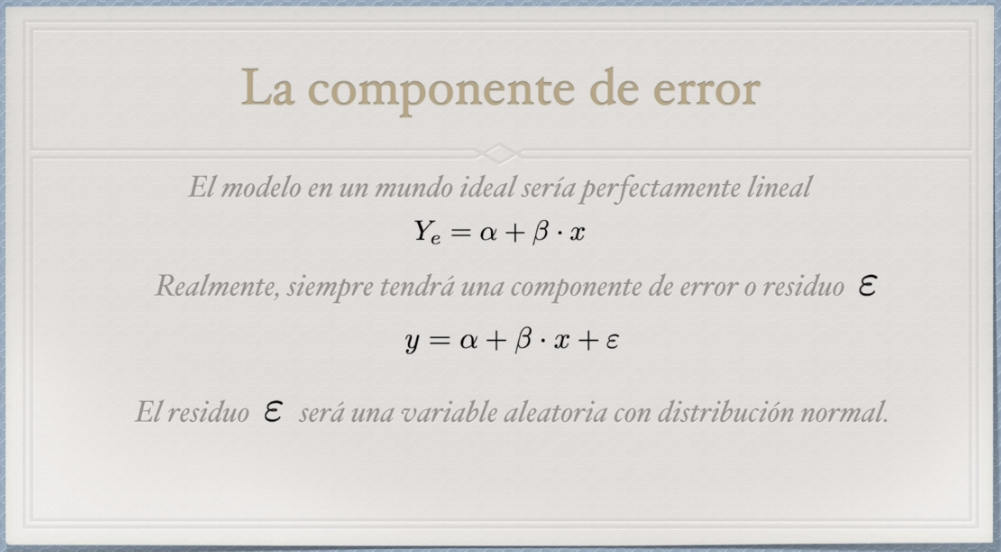

In [85]:
Image(filename='../Recursos/Regresion Lineal/Componente de error.PNG')

In [48]:
x = 1.5 + 2.5 * np.random.randn(100)

In [49]:
res = 0 + 0.8 * np.random.randn(100)

In [50]:
y_pred = 5 + 0.3 * x

In [51]:
y_act = 5 + 0.3 * x + res

In [52]:
data = pd.DataFrame(
    {
        'x' : x.tolist(),
        'y_actual' : y_act.tolist(),
        'y_prediccion' : y_pred.tolist() 
    }
)

In [53]:
data.head()

,x,y_actual,y_prediccion
0,5.863970,8.404020,6.759191
1,4.496001,6.783836,6.348800
2,3.431114,6.995907,6.029334
3,-1.231024,4.443971,4.630693
4,2.679700,5.941918,5.803910


In [54]:
import matplotlib.pyplot as plt

In [55]:
y_mean = [np.mean(y_act) for i in range(1, len(x.tolist()) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

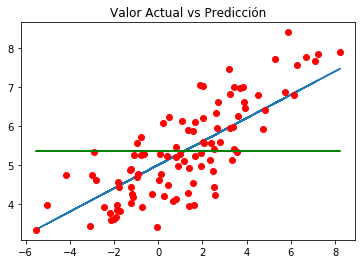

In [56]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

### ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [57]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2
data

,x,y_actual,y_prediccion,SSR,SSD,SST
0,5.863970,8.404020,6.759191,1.963619,2.705464,9.278855
1,4.496001,6.783836,6.348800,0.981885,0.189256,2.033295
2,3.431114,6.995907,6.029334,0.450825,0.934262,2.683068
3,-1.231024,4.443971,4.630693,0.528829,0.034865,0.835264
4,2.679700,5.941918,5.803910,0.198926,0.019046,0.341078
...,...,...,...,...,...,...
95,-1.719609,3.814615,4.484117,0.763495,0.448234,2.381727
96,3.551672,5.319403,6.065501,0.500701,0.556663,0.001482
97,7.227561,7.841248,7.168268,3.277436,0.452901,6.167019
98,5.269035,7.715539,6.580710,1.495267,1.287835,5.558464


In [58]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
R2 = SSR/SST

In [59]:
SSR, SSD, SST, SSR+SSD, R2

(68.0580018311613,
 53.986553835409154,
 144.1254696209745,
 122.04455566657046,
 0.47221356509812096)

(array([ 4.,  4., 11., 16., 11., 18., 12., 15.,  4.,  5.]),
 array([-1.64482937, -1.32342284, -1.00201631, -0.68060977, -0.35920324,
        -0.03779671,  0.28360983,  0.60501636,  0.92642289,  1.24782942,
         1.56923596]),
 <a list of 10 Patch objects>)

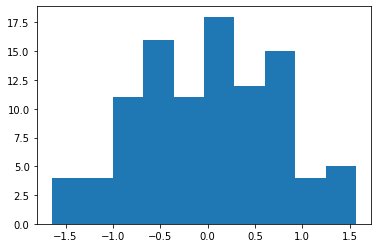

In [71]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [60]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.198883717752388, 5.357899150382999)

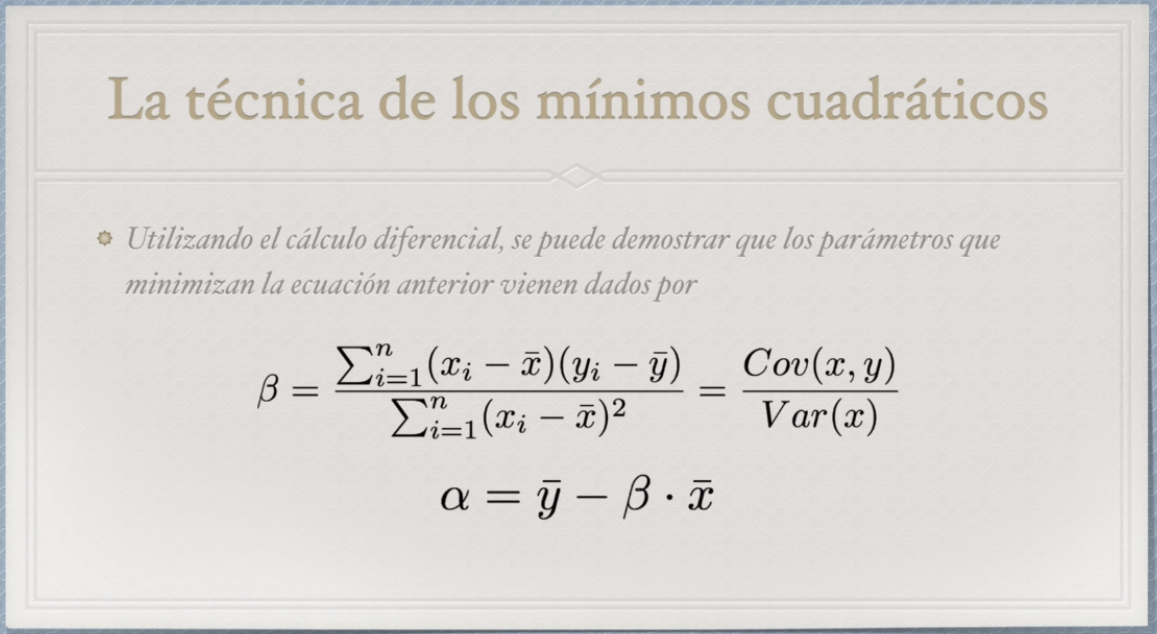

In [84]:
Image(filename='../Recursos/Regresion Lineal/Minimos Cuadraticos 3.PNG')

In [62]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [70]:
beta = sum(data['beta_n']) / sum(data['beta_d'])
alpha = y_mean - beta * x_mean
alpha, beta

(4.939886779954375, 0.3486679852590663)

El modelo lineal obtenido por regresión es **y = 4.939886779954375 + 0.3486679852590663 * x**

In [72]:
data["y_model"] = alpha + beta * data["x"]

In [73]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)
R2 = SSR / SST
SSR, SSD, SST, SSR+SSD, R2

(91.93033423269766,
 52.195135388276896,
 144.1254696209745,
 144.12546962097457,
 0.6378493299932261)

Text(0.5, 1.0, 'Valor Actual vs Predicción')

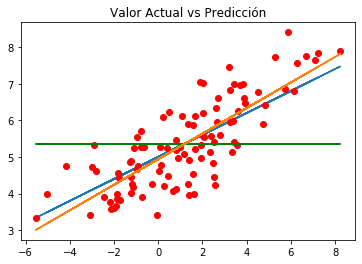

In [76]:
y_mean = [np.mean(y_act) for i in range(1, len(x.tolist()) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar residual (RSE)

In [78]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7297968363382757

In [79]:
np.mean(data["y_actual"])

5.357899150382999

In [80]:
RSE / np.mean(data["y_actual"])

0.13620951344074994

Entorno al 13% de error del modelo.